In [1]:
import scanpy as sc
#import session_info
import os
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#import seaborn as sns
import math
#from plotnine import *
#import scvi
import os
#import celltypist
#import scanpy
# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=50, facecolor="white", frameon=False, figsize=(5,5))
%matplotlib inline
sc.settings.verbosity = 0




In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#%matplotlib inline
sc.settings.figdir = "fig3"
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(8,8))


In [3]:
#adata=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.v8_nohealthy')
PATH = '/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.final.filtered'
adata=sc.read_h5ad(PATH)
adata_5k=adata[adata.obs["tech"]=="xenium"].copy()
#adata=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.final.filtered.scrna')
adata=adata[adata.obs["tech"]!="xenium"].copy()

import gc
gc.collect()


#adata=sc.read_h5ad(PATH2)
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata.var_names]
    return LIST

 


In [4]:
# FILE_NAME = "adata_xenium_freeze_plus3d.h5ad"  #"adata_xenium_v3.h5ad.final.timepointsforpaper"
# PATH=f'/nfs/team298/ls34/adult_skin/final_adatas/{FILE_NAME}'

# adata_5k=sc.read_h5ad(PATH)
# # adata_5k.obs["Timepoint2"].value_counts()
# #adata_5k=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_xenium_v1.h5ad.final')
# def remove_markers(LIST):
#     try: 
#         LIST = {key: [gene for gene in genes if gene in adata_5k.var_names] 
#                            for key, genes in LIST.items()}
#     except: 
#         LIST =[gene for gene in LIST if gene in adata_5k.var_names]
#     return LIST



# adata_5k.obs["lvl5_annotation_new"]=adata_5k.obs["lvl5_annotation"]

# adata_5k



In [5]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

sc.pp.normalize_total(adata_5k, target_sum=1e4)
sc.pp.log1p(adata_5k)

In [6]:
CATEGORY="lvl5_annotation"

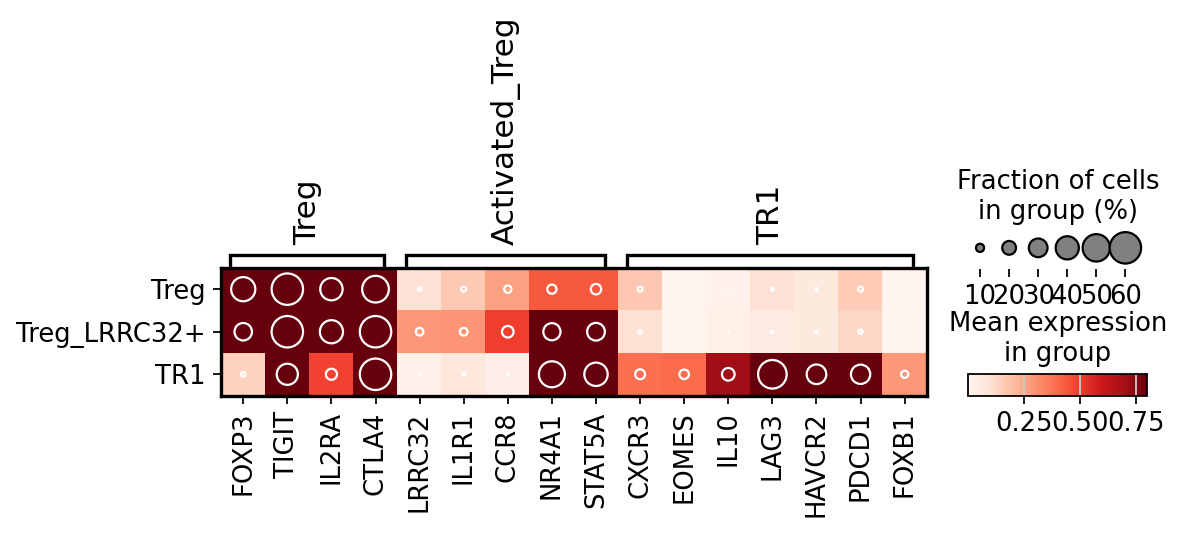

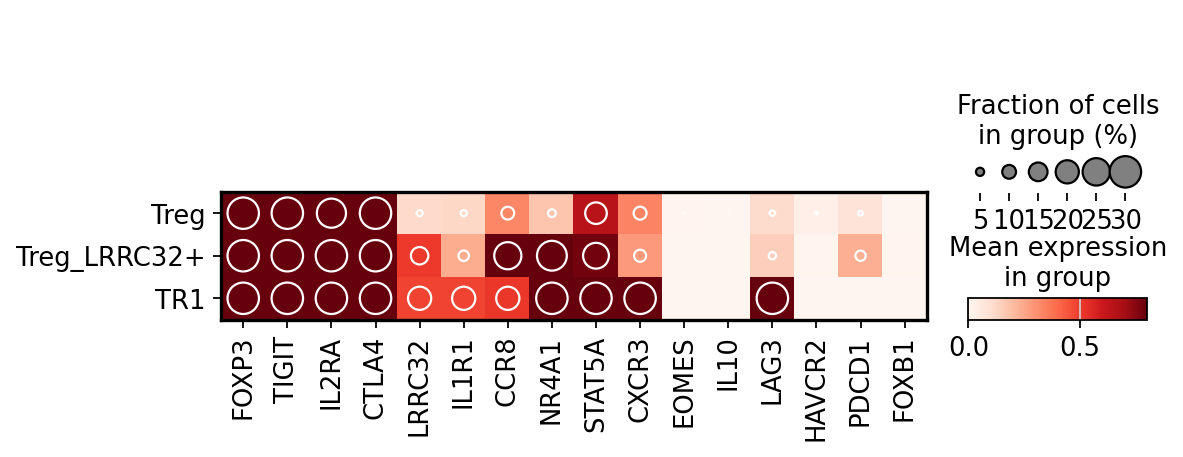

In [7]:
adata_ii=adata[(adata.obs[CATEGORY]==("Treg"))|
               (adata.obs[CATEGORY].str.startswith("Treg_LRRC32+"))|
                (adata.obs[CATEGORY].str.startswith("TR1"))
                ]
#adata_iii=adata_ii[adata_ii.obs["disease_overall"]=="AD"]
adata_5k_ii=adata_5k[(adata_5k.obs[CATEGORY]==("Treg"))|
               (adata_5k.obs[CATEGORY].str.startswith("Treg_LRRC32+"))|
                (adata_5k.obs[CATEGORY].str.startswith("TR1"))
                ]


adata_5k_ii=adata_5k_ii[adata_5k_ii.obs["Site_status"].isin(["Lesional", "Non-lesional"])]

# for x in adata_5k_ii.obs["disease_overall"].unique():
#     print(x)
#     adata_5k_iii=adata_5k_ii[adata_5k_ii.obs["disease_overall"]==x]
TREG_GENES =  { 'Treg': ['FOXP3', 'TIGIT',  "IL2RA",      'CTLA4',],
         "Activated_Treg": ["LRRC32", "IL1R1",#"IL1R2", 
                            "CCR8", #'TRAF3',  "ITGAV",
                            #'CMSS1', 'LRRC32',
                          #  'F5',# "TOX"
                         #  'ZNF331', 'JMY', 'ELL2','NR4A3',
                            'NR4A1',#'BICDL1',
                           "STAT5A",

                           ],
              'TR1': [ #"CD69",
                            #'IFIT3',
                            #"SOCS1", 
                            "CXCR3", 'EOMES', 'IL10', 'LAG3', 'HAVCR2', "PDCD1", 'FOXB1',
         ]
              }
flat_gene_list = [gene for genes in TREG_GENES.values() for gene in genes]
sc.pl.DotPlot(
    adata_ii,
   TREG_GENES,
    #swap_axes=True,
    groupby=CATEGORY,
   vmax=.8,
    #    colorbar_title='Mean expression\n(variance scaled)', 
   # standard_scale="var",
    categories_order=["Treg", "Treg_LRRC32+", "TR1"],
      #  savefig="Treg_scrna.pdf"

) \
    .style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=1, grid=False, #vmax=.8
               dot_max=.6

          )\
.show()


sc.pl.DotPlot(
    adata_5k_ii,
   remove_markers(flat_gene_list),
    #swap_axes=True,
    groupby=CATEGORY,
   vmax=.8,
        categories_order=["Treg", "Treg_LRRC32+", "TR1"],

    #    colorbar_title='Mean expression\n(variance scaled)', 
   # standard_scale="var",
   # savefig="Treg_xenium.pdf"
) \
    .style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=1, grid=False, #vmax=.8
               dot_max=.3

          )\
.show()


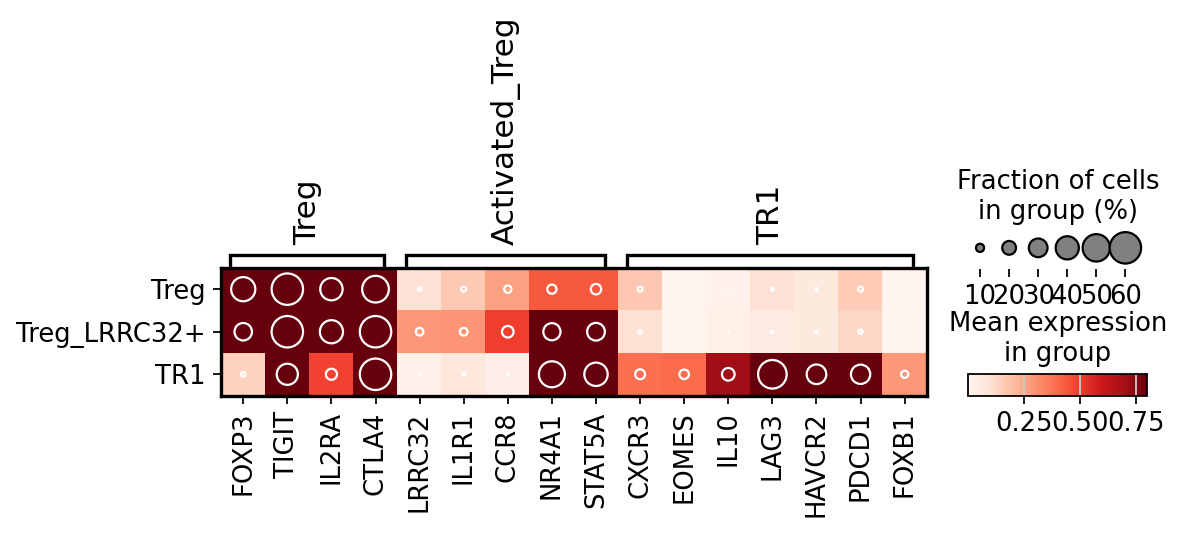

In [8]:
# adata_ii=adata[(adata.obs[CATEGORY]==("Treg"))|
#                (adata.obs[CATEGORY].str.startswith("Treg_LRRC32+"))|
#                 (adata.obs[CATEGORY].str.startswith("TR1"))
#                 ]
# #adata_iii=adata_ii[adata_ii.obs["disease_overall"]=="AD"]
# adata_5k_ii=adata_5k[(adata_5k.obs[CATEGORY]==("Treg"))|
#                (adata_5k.obs[CATEGORY].str.startswith("Treg_LRRC32+"))|
#                 (adata_5k.obs[CATEGORY].str.startswith("TR1"))
#                 ]


# adata_5k_ii=adata_5k_ii[adata_5k_ii.obs["Site_status"].isin(["Lesional", "Non-lesional"])]

# # for x in adata_5k_ii.obs["disease_overall"].unique():
# #     print(x)
# #     adata_5k_iii=adata_5k_ii[adata_5k_ii.obs["disease_overall"]==x]
# TREG_GENES =  { 'Treg': ['FOXP3', 'TIGIT',  "IL2RA",      'CTLA4',],
#          "Activated_Treg": ["LRRC32", "IL1R1",#"IL1R2", 
#                             "CCR8", #'TRAF3',  "ITGAV",
#                             #'CMSS1', 'LRRC32',
#                           #  'F5',# "TOX"
#                          #  'ZNF331', 'JMY', 'ELL2','NR4A3',
#                             'NR4A1',#'BICDL1',
#                            "STAT5A",

#                            ],
#               'TR1': [ #"CD69",
#                             #'IFIT3',
#                             #"SOCS1", 
#                             "CXCR3", 'EOMES', 'IL10', 'LAG3', 'HAVCR2', "PDCD1", 'FOXB1',
#          ]
#               }
# flat_gene_list = [gene for genes in TREG_GENES.values() for gene in genes]

# TREG_GENES = {
#     'Treg': ['FOXP3', 'TIGIT', "IL2RA", 'CTLA4'],
#     "Activated_Treg": ["LRRC32", "IL1R1", "CCR8", "ITGAV"],
#     "TR1": ["LAG3", "IL10", "MIR155HG", "HAVCR2"],
# }

flat_gene_list = [gene for genes in TREG_GENES.values() for gene in genes]

# Create dotplot
dp = sc.pl.DotPlot(
    adata_ii,
   remove_markers(TREG_GENES),
    groupby=CATEGORY,
    vmax=0.8,
    categories_order=["Treg", "Treg_LRRC32+", "TR1"]
)

# Style it
dp = dp.style(
    cmap='Reds',
    color_on='square',
    dot_edge_color='white',
    dot_edge_lw=1,
    grid=False,
    dot_max=0.6
)

# Save BEFORE showing
dp.savefig("fig3/3i_Treg_scrna.pdf", dpi=300)

# Optionally display
#dp.show()
 

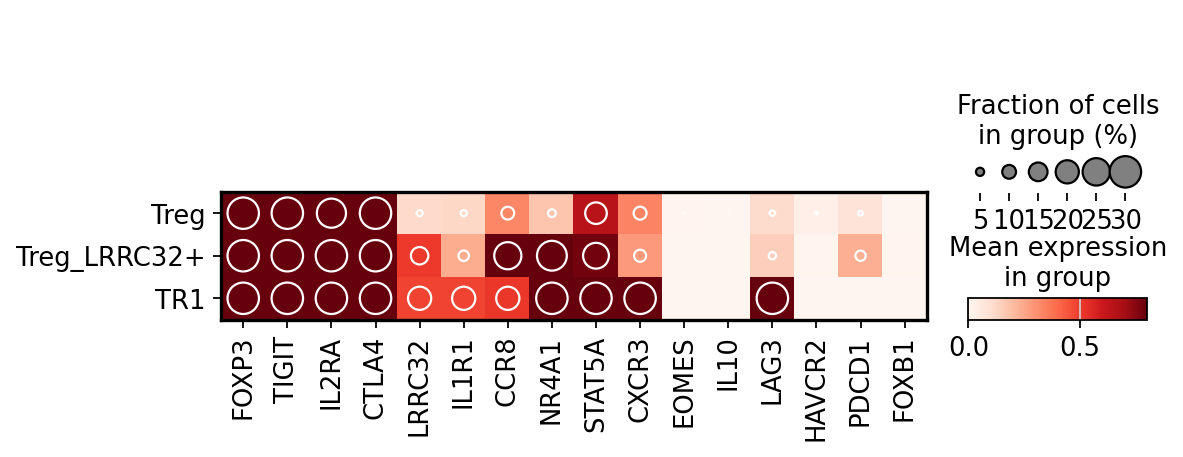

In [9]:
# Create dotplot
dp = sc.pl.DotPlot(
    adata_5k_ii,
   remove_markers(flat_gene_list),
    groupby=CATEGORY,
    vmax=0.8,
    categories_order=["Treg", "Treg_LRRC32+", "TR1"]
)

# Style it
dp = dp.style(
    cmap='Reds',
    color_on='square',
    dot_edge_color='white',
    dot_edge_lw=1,
    grid=False,
    dot_max=0.3
)

# Save BEFORE showing
dp.savefig("fig3/3i_Treg_xenium.pdf", dpi=300)

# Optionally display
#dp.show()

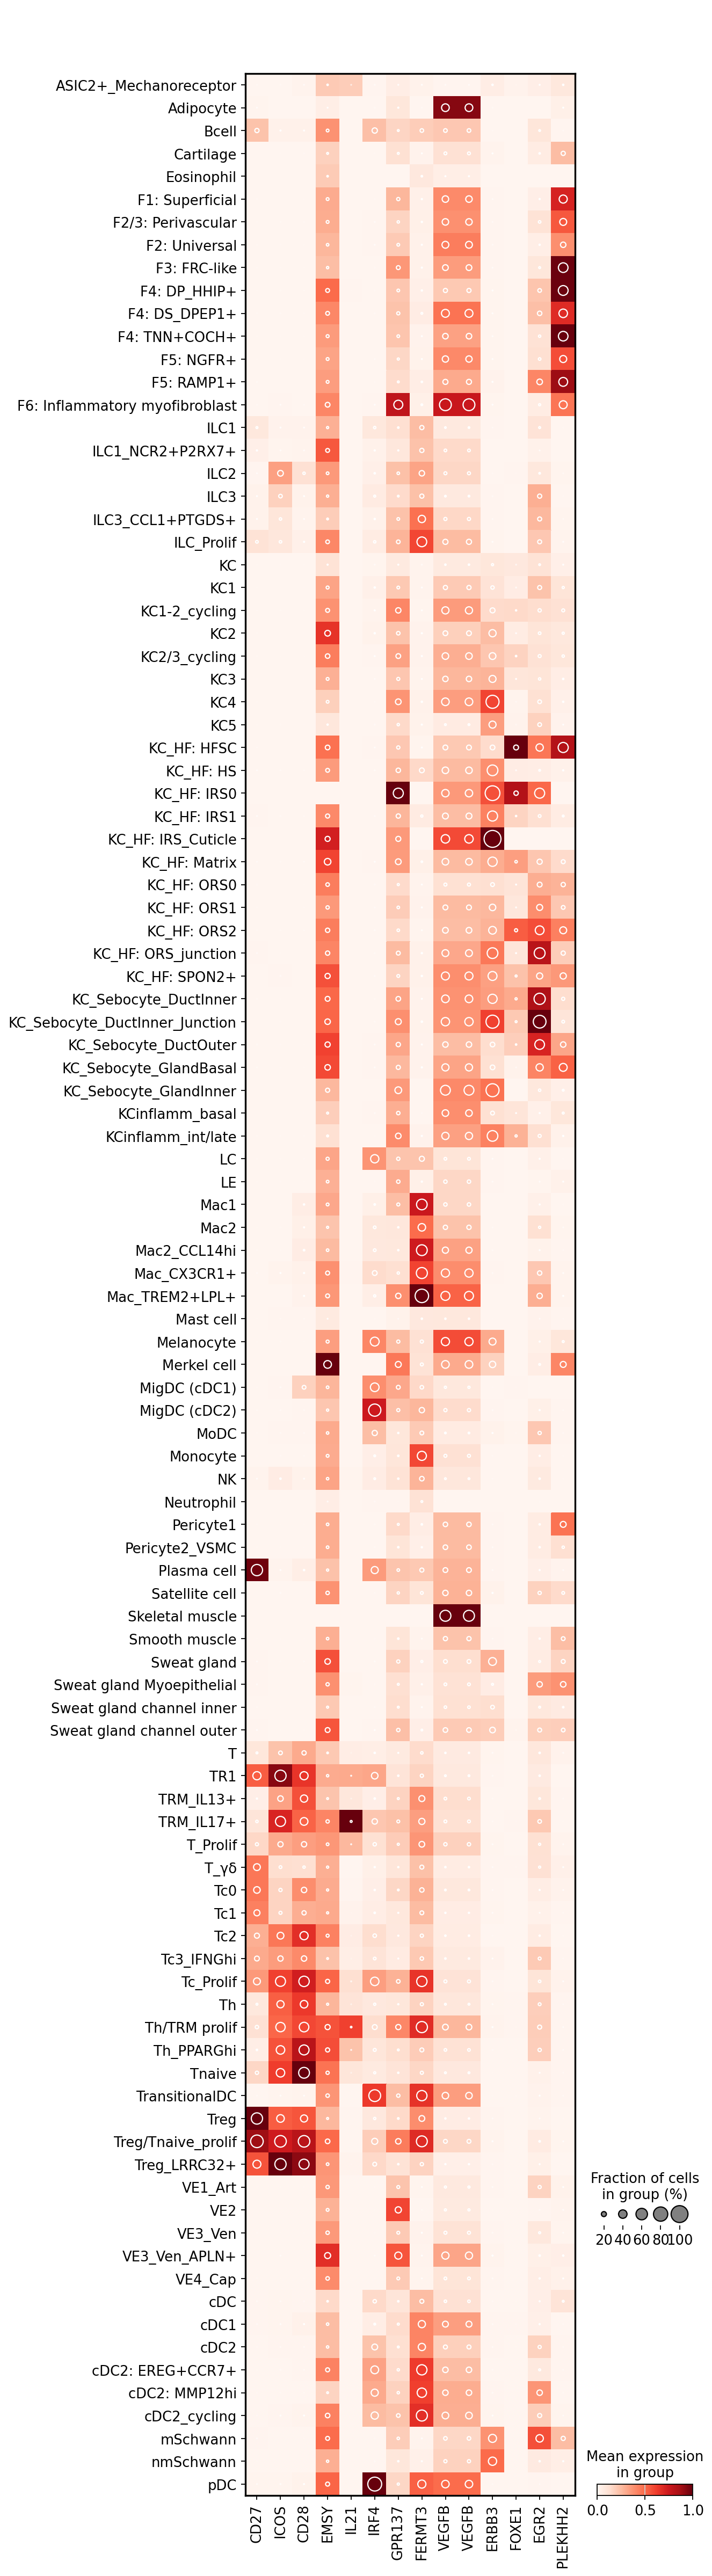

In [10]:
AA_genes = [
    "CCDC88B",
    "VAMP1",
    "CD27",
    "CTLA5",
    "ICOS",
    "CD28",
    "EMSY",
    "IL21",
    "IRF4",
    "DNAJC4",
    "RPS6KA4",
    "DUSP22",
    "GPR137",
    "FERMT3",
    "FPR3",
    "PLCB3",
    "VEGFB",
    "PA2G4",
    "PPP1R14B",
    "VEGFB",
    "PA2GF",
    "PPP1R14B",
    "PRDX15",
    "MACROD1",
    "ERBB3",
    "ORMDL2",
    "FOXE1",
    "EGR2",
    "ADO",
    "TRPT1",
    "HAS1",
    "PLEKHH2",
    "DYNC2LI1",
    "DEXI",
]

try:
    sc.pl.DotPlot(
            adata,
           AA_genes,
            #swap_axes=True,
            groupby="lvl5_annotation",
           vmax=1,
            #    colorbar_title='Mean expression\n(variance scaled)', 
            standard_scale="var",
        ) \
            .style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=1, grid=False, #vmax=.8
                       dot_max=1

                  )\
        .show()
except:
    sc.pl.DotPlot(
            adata,
           remove_markers(AA_genes),
            #swap_axes=True,
            groupby="lvl5_annotation",
           vmax=1,
            #    colorbar_title='Mean expression\n(variance scaled)', 
            standard_scale="var",
        ) \
            .style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=1, grid=False, #vmax=.8
                       dot_max=1

                  )\
        .show()



In [11]:
# adata_ii=adata[(adata.obs[CATEGORY].str.startswith("Treg"))|
#                 (adata.obs[CATEGORY].str.startswith("TR1"))
#                 ]
# adata_iii=adata_ii[adata_ii.obs["Patient_status"]=="Eczema"]
# adata_5k_ii=adata_5k[(adata_5k.obs[CATEGORY].str.startswith("Treg"))|
#                 (adata_5k.obs[CATEGORY].str.startswith("TR1"))
#                 ]


# adata_5k_ii=adata_5k_ii[adata_5k_ii.obs["Site_status"].isin(["Lesional", "Nonlesional"])]

# for x in adata_5k_ii.obs["disease_overall"].unique():
#     print(x)
#     adata_5k_iii=adata_5k_ii[adata_5k_ii.obs["disease_overall"]==x]
#     TREG_GENES =  { 'Treg': ['FOXP3', 'TIGIT',  "IL2RA",      'CTLA4',],
#              "Activated_Treg": ["LRRC32", "IL1R1",#"IL1R2", 
#                                 "CCR8", #'TRAF3',  "ITGAV",
#                                 #'CMSS1', 'LRRC32',
#                               #  'F5',# "TOX"
#                              #  'ZNF331', 'JMY', 'ELL2','NR4A3',
#                                 'NR4A1',#'BICDL1',
#                                "STAT5A",

#                                ],
#                   'TR1': [ #"CD69",
#                                 #'IFIT3',
#                                 #"SOCS1", 
#                                 "CXCR3", 'EOMES', 'IL10', 'LAG3', 'HAVCR2', "PDCD1", 'FOXB1',
#              ]
#                   }
#     flat_gene_list = [gene for genes in TREG_GENES.values() for gene in genes]
#     sc.pl.DotPlot(
#         adata_iii,
#        TREG_GENES,
#         #swap_axes=True,
#         groupby=CATEGORY,
#        vmax=.8,
#         #    colorbar_title='Mean expression\n(variance scaled)', 
#        # standard_scale="var",
#     ) \
#         .style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=1, grid=False, #vmax=.8
#                    dot_max=.6

#               )\
#     .show()


#     sc.pl.DotPlot(
#         adata_5k_iii,
#        remove_markers(flat_gene_list),
#         #swap_axes=True,
#         groupby=CATEGORY,
#        vmax=.8,
#         #    colorbar_title='Mean expression\n(variance scaled)', 
#        # standard_scale="var",
#     ) \
#         .style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=1, grid=False, #vmax=.8
#                    dot_max=.3

#               )\
#     .show()


In [12]:
# STOP

# LOAD JOINT EMBEDDING

In [13]:
import os
#BASE='/lustre/scratch124/cellgen/haniffa/projects/developmental_fibroblasts/nobackup_output/model_scvi5_HDAC_Stroma_ALL_v2_5903/subclustered_adatas/'
#BASE =  '/lustre/scratch124/cellgen/haniffa/projects/adult_skin_v1/nobackup_output/subclustered_adatas_v2/'
#os.listdir(BASE)

In [14]:
#adata_all = sc.read_h5ad(BASE +  'adata_subclustered_T_ILC.h5ad')
#adata_all
adata_all=sc.read_h5ad('/lustre/scratch124/cellgen/haniffa/projects/adult_skin_v1/nobackup_output/subcluster2000_v6/adata_T.h5ad')

In [15]:
CATEGORY="lvl5_annotation"

In [16]:
adata_all_i =adata_all[(adata_all.obs[CATEGORY]==("Treg"))|
                       (adata_all.obs[CATEGORY]==("Treg_LRRC32+"))|
                (adata_all.obs[CATEGORY].str.startswith("TR1"))
                ]

In [17]:
# import anndata as ad
# adata_all = ad.concat([adata_i, adata_5k_i], label="tech", keys=["scrna", "xenium"])

In [18]:
# sc.settings.set_figure_params(dpi=50, facecolor="white", frameon=False, figsize=(21,21))

# sc.pl.umap(
#     adata_all_i,
#     color=[
#          "tech", CATEGORY 
#     ],
#     legend_loc="on data",
#     s=40, #neighbors_key="n",
#     legend_fontsize=17,
#     legend_fontoutline=2,
#     # frame_on=False
 
# )

In [19]:
N_NEIGHBORS = 20
MIN_DIST = 0.1

sc.pp.neighbors(adata_all_i, n_neighbors=N_NEIGHBORS, use_rep = "X_scvi", key_added=f"n_{N_NEIGHBORS}")
print(f"neighbors done", N_NEIGHBORS)

/software/cellgen/team298/ls34/scpoli/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


neighbors done 20


In [20]:
sc.tl.umap(adata_all_i, min_dist=MIN_DIST, neighbors_key =f"n_{N_NEIGHBORS}") 
#sc.tl.leiden(adata_all_i, resolution=1, key_added='leiden_res1', neighbors_key="neighbor_20")
#sc.tl.leiden(adata_all_i, resolution=2, key_added='leiden_res2', neighbors_key="neighbor_20")


In [21]:
import pickle

file_path = '/nfs/team298/ls34/color_for_adult_skin2.pkl'

with open(file_path, 'rb') as file:
    colors = pickle.load(file)



In [22]:
# adata_all_i.obs['lvl5_annotation'] =adata_all_i.obs['lvl5_annotation'] .astype('category')
# adata_all_i.uns['lvl5_annotation_colors'] = [colors.get(cat, '#D3D3D3')  # Default to light grey if not found
#                                      for cat in adata_all_i.obs['lvl5_annotation'].cat.categories]


In [23]:
colors2 = { "scrna": "#F8F4E3",
             "xenium": "#D23C3C"
          }

adata_all_i.obs['tech'] =adata_all_i.obs['tech'] .astype('category')
adata_all_i.uns['tech_colors'] = [colors2.get(cat, '#D3D3D3')  # Default to light grey if not found
                                     for cat in adata_all_i.obs['tech'].cat.categories]



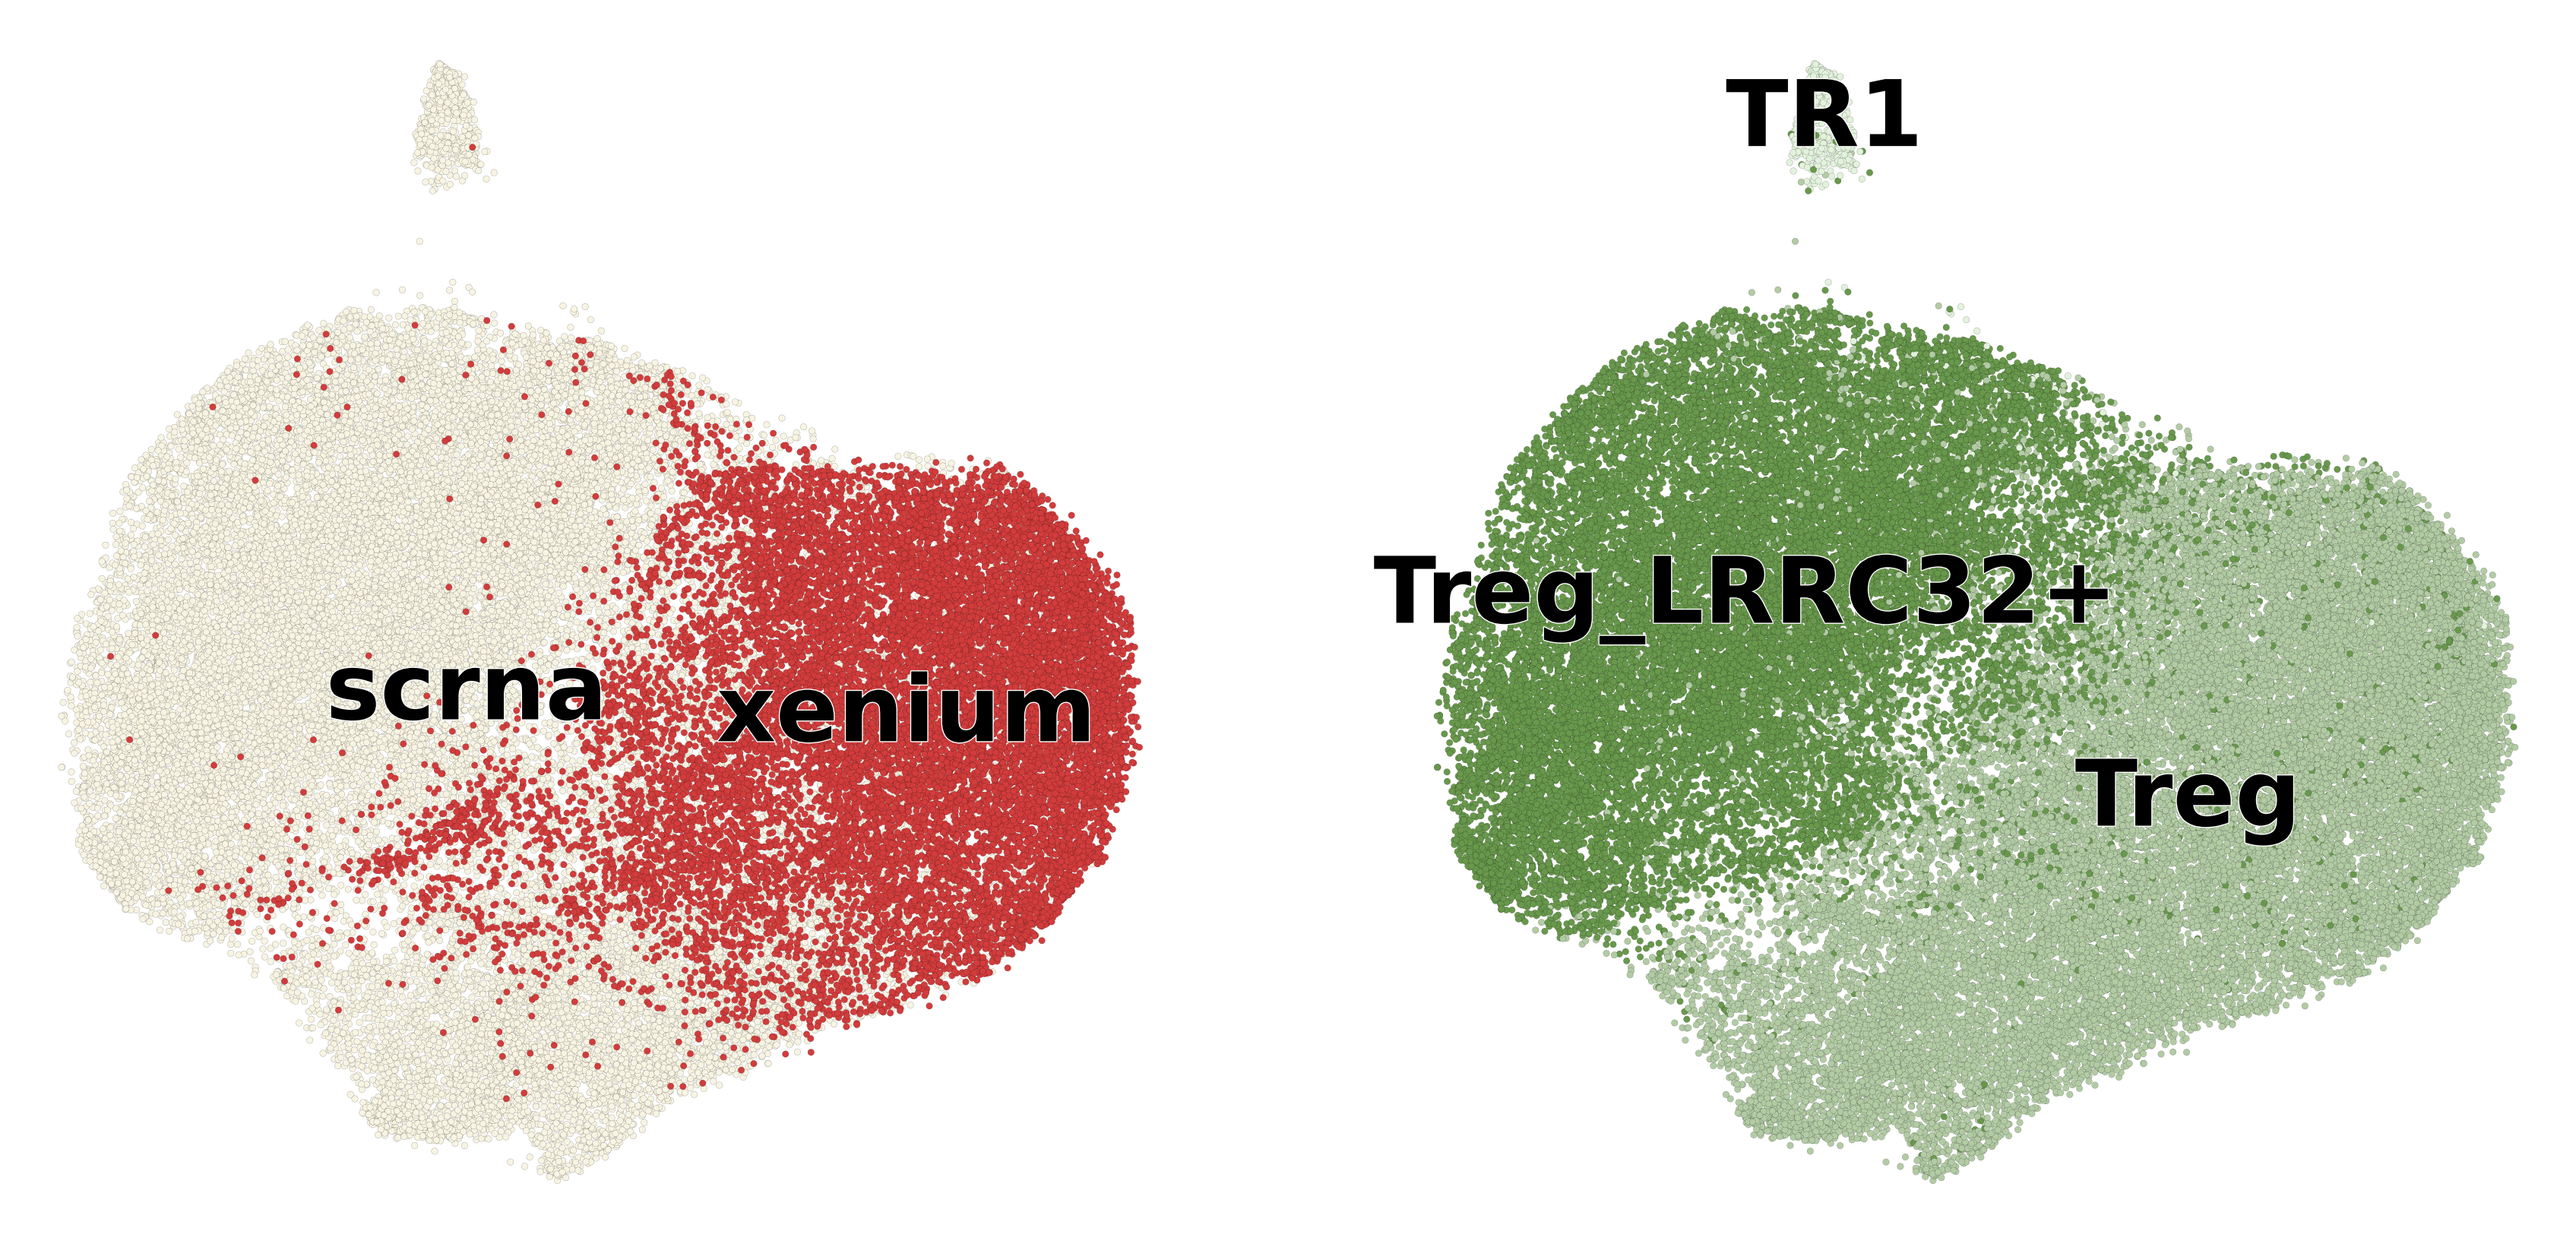

In [24]:
sc.settings.set_figure_params(dpi=50, facecolor="white", frameon=False, figsize=(21,21))

sc.pl.umap(
    adata_all_i,
    color=[
         "tech", CATEGORY 
    ],
    legend_loc="on data",
    s=150, #neighbors_key="n",
    legend_fontsize=87,
    legend_fontoutline=2,
    linewidth=0.1,
    edgecolor='black',
    title=['','',''],
    save="3i_Treg_umap.pdf"
    # frame_on=False
 
)

In [25]:
# TREG_GENES =  { 'Treg': ['FOXP3', 'TIGIT',  "IL2RA",      'CTLA4',],
#              "Activated_Treg": ["LRRC32", "IL1R1",#"IL1R2", 
#                                 "CCR8", #'TRAF3',  "ITGAV",
#                                 #'CMSS1', 'LRRC32',
#                               #  'F5',# "TOX"
#                              #  'ZNF331', 'JMY', 'ELL2','NR4A3',
#                                 'NR4A1',#'BICDL1',
#                                "STAT5A",
#                                 "ICOS",

#                                ],
#                   'TR1': [ #"CD69",
#                                 #'IFIT3',
#                                 #"SOCS1", 
#                                 "CXCR3", 'EOMES', 'IL10', 'LAG3', 'HAVCR2', "PDCD1", #'FOXB1',
#              ]
#                   }

# flat_gene_list = [gene for genes in TREG_GENES.values() for gene in genes]

    
    
# for x in adata_all_i.obs["tech"].unique():
#     print(x)
#     adata_all_ii=adata_all_i[adata_all_i.obs["tech"]==x]
#     if x !="xenium":
#         DOT_MAX=0.6
#         ORDER = ["Treg", "Treg_LRRC32+", "TR1"]

#     else:
#         DOT_MAX=0.6
#         ORDER = ["Treg", "Treg_LRRC32+"]

#     sc.pl.DotPlot(
#             adata_all_ii,
#            remove_markers(TREG_GENES),
#             #swap_axes=True,
#             groupby=CATEGORY,
#            vmax=.7,
#         categories_order=ORDER
#             #    colorbar_title='Mean expression\n(variance scaled)', 
#            # standard_scale="var",
#         ) \
#             .style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=1, grid=False, #vmax=.8
#                        dot_max=DOT_MAX

#                   )\
#         .show()
#     sc.pl.DotPlot(
#             adata_all_ii,
#            remove_markers(flat_gene_list),
#             #swap_axes=True,
#             groupby=CATEGORY,
#            vmax=.7,
#         categories_order=ORDER
#             #    colorbar_title='Mean expression\n(variance scaled)', 
#            # standard_scale="var",
#         ) \
#             .style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=1, grid=False, #vmax=.8
#                        dot_max=DOT_MAX

#                   )\
#         .show()
